In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# generate synthetic two-dimensional data
X, y = make_blobs(n_samples = 100, random_state=10)

In [9]:
X.shape

(100, 2)

In [10]:
X[:10]

array([[ -2.32496308,  -6.6999964 ],
       [  0.51856831,  -4.90086804],
       [  2.44301805,   3.84652646],
       [  5.82662285,  -9.92259335],
       [  2.03300209,   5.28990817],
       [  3.37979515,   4.18880872],
       [  6.04774884, -10.30504657],
       [ -0.42084194,  -4.24889336],
       [  3.78067293,   5.22062163],
       [  5.69248303,  -7.19999368]])

In [11]:
y.shape

(100,)

In [12]:
y[:10]

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0])

Text(0, 0.5, 'Feature2')

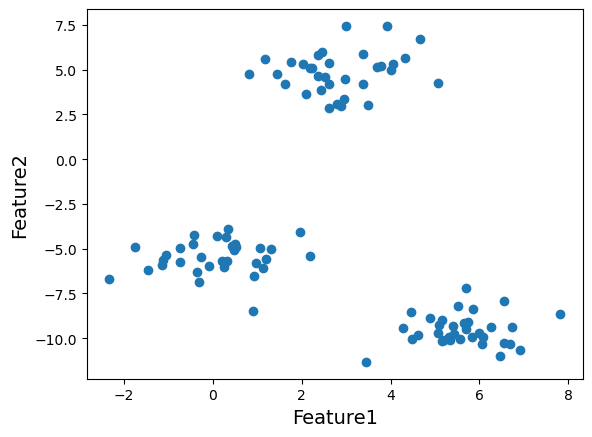

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)

In [19]:
kmeans = KMeans(n_clusters=3, max_iter=10, n_init=1)
kmeans.fit(X)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=10, n_clusters=3, n_init=1)

In [31]:
kmeans?

Type:        KMeans
String form: KMeans(n_clusters=5, n_init=1)
File:        d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from data
    for the ini

In [20]:
labels = kmeans.labels_
labels

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2])

In [21]:
# Centroids 
centers = kmeans.cluster_centers_
centers

array([[ 2.84050716,  4.85840422],
       [ 0.08921213, -5.46441742],
       [ 5.6183469 , -9.54288499]])

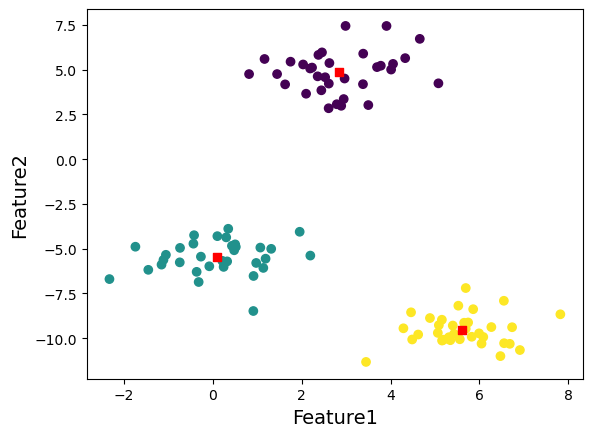

In [22]:
plt.scatter(X[:,0],X[:,1], c = labels.astype(float))
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
# draw centers 
plt.scatter(centers[:,0],  centers[:,1], c="red", marker="s")
plt.show()

In [12]:
print(kmeans.transform(X[:10]))   # Show distance between centroids and points
print(labels[:10])

[[ 2.7119914  12.66012274  8.43671672]
 [ 0.70847346 10.03168954  6.89609041]
 [ 9.60385746  1.08714957 13.76077949]
 [ 7.26589392 15.07961458  0.43307887]
 [10.92857897  0.91556546 15.25996233]
 [10.19866225  0.8597614  13.91296253]
 [ 7.67696883 15.4989238   0.87480072]
 [ 1.31820101  9.67363774  8.03107398]
 [11.30473097  1.00752823 14.8774384 ]
 [ 5.86590741 12.39107446  2.34406396]]
[0 0 1 2 1 1 2 0 1 2]


In [25]:
kmeans.inertia_

186.3658862010144

In [26]:
kmeans.n_iter_

2

In [27]:
kmeans.score(X)

-186.36588620101446

In [29]:
cost = []
for k in range(2,6):
   kmeans = KMeans(n_clusters=k, n_init=1)
   kmeans.fit(X)
   cost.append(kmeans.inertia_)   

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Text(0, 0.5, 'Inertia (Cost)')

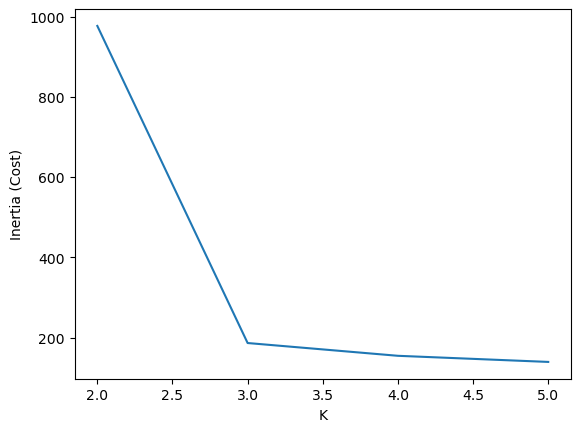

In [30]:
plt.plot(range(2,6), cost)
plt.xlabel("K")
plt.ylabel("Inertia (Cost)")